# FEATURE ENGINEERING

In [1]:
#Reading the Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
print(data)

      iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.498
1          AFG      Asia  ...           64.83                   0.498
2          AFG      Asia  ...           64.83                   0.498
3          AFG      Asia  ...           64.83                   0.498
4          AFG      Asia  ...           64.83                   0.498
...        ...       ...  ...             ...                     ...
56650      ZWE    Africa  ...           61.49                   0.535
56651      ZWE    Africa  ...           61.49                   0.535
56652      ZWE    Africa  ...           61.49                   0.535
56653      ZWE    Africa  ...           61.49                   0.535
56654      ZWE    Africa  ...           61.49                   0.535

[56655 rows x 52 columns]


# LETS CHECK ALL THE COLUMNS WE HAVE FIRST

In [2]:
columns=list(data.columns)
columns

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'total_vaccinations_per_hundred',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiova

# NA VALUES IN THE DATASET IN PERCENTAGE :

In [3]:
(data.isnull().mean())*100

iso_code                               0.573648
continent                              1.175536
location                               0.000000
date                                   0.000000
total_cases                            0.983144
new_cases                              0.993734
new_cases_smoothed                     2.681140
total_deaths                          15.474362
new_deaths                            15.476127
new_deaths_smoothed                    2.681140
total_cases_per_million                1.556791
new_cases_per_million                  1.567382
new_cases_smoothed_per_million         3.245962
total_deaths_per_million              16.025064
new_deaths_per_million                16.026829
new_deaths_smoothed_per_million        3.245962
reproduction_rate                     24.979260
icu_patients                          89.065396
icu_patients_per_million              89.065396
hosp_patients                         87.773365
hosp_patients_per_million             87

# EXPECT DATE AND LOCATION EVERY COLUMN HAS FEATURES MISSING

In [4]:
for i in data.columns:
    if(data[i].dtype!=type(object)):
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        IQR=q3-q1
        ub=q3+(1.5*IQR)
        lb=q1-(1.5*IQR)
        for j in range(0,len(data[i])):
            if(data[i][j]>ub):
                data[i].replace(data[i][j],ub,inplace=True)
            elif(data[i][j]<lb):
                data[i].replace(data[i][j],lb,inplace=True)

# LETS CHECK IF THEY ARE ANY OUTLIERS AFTER THE OUTLIER TREATMENT:

In [5]:
#AFTER REPLACING OUTLIERS WITH UPPER BOUND AND LOWER BOUND 
for i in data.columns:
    if(data[i].dtype!=type(object)):
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        IQR=q3-q1
        ub=q3+(1.5*IQR)
        lb=q1-(1.5*IQR)
        out_ub=data[data[i]>ub][i]
        out_lb=data[data[i]<lb][i]
        print("no of outliers in",i,"is",len(out_ub)+len(out_lb))

no of outliers in total_cases is 0
no of outliers in new_cases is 0
no of outliers in new_cases_smoothed is 0
no of outliers in total_deaths is 0
no of outliers in new_deaths is 0
no of outliers in new_deaths_smoothed is 0
no of outliers in total_cases_per_million is 0
no of outliers in new_cases_per_million is 0
no of outliers in new_cases_smoothed_per_million is 0
no of outliers in total_deaths_per_million is 0
no of outliers in new_deaths_per_million is 0
no of outliers in new_deaths_smoothed_per_million is 0
no of outliers in reproduction_rate is 0
no of outliers in icu_patients is 0
no of outliers in icu_patients_per_million is 0
no of outliers in hosp_patients is 0
no of outliers in hosp_patients_per_million is 0
no of outliers in weekly_icu_admissions is 0
no of outliers in weekly_icu_admissions_per_million is 0
no of outliers in weekly_hosp_admissions is 0
no of outliers in weekly_hosp_admissions_per_million is 0
no of outliers in new_tests is 0
no of outliers in total_tests is

# LETS SEE IF THE SKEWNESS IS DECRESED BECAUSE OF THIS :

In [21]:
numerical_feats = data.dtypes[data.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = data.dtypes[data.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  47
Number of Categorical features:  5


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

ValueError: ignored

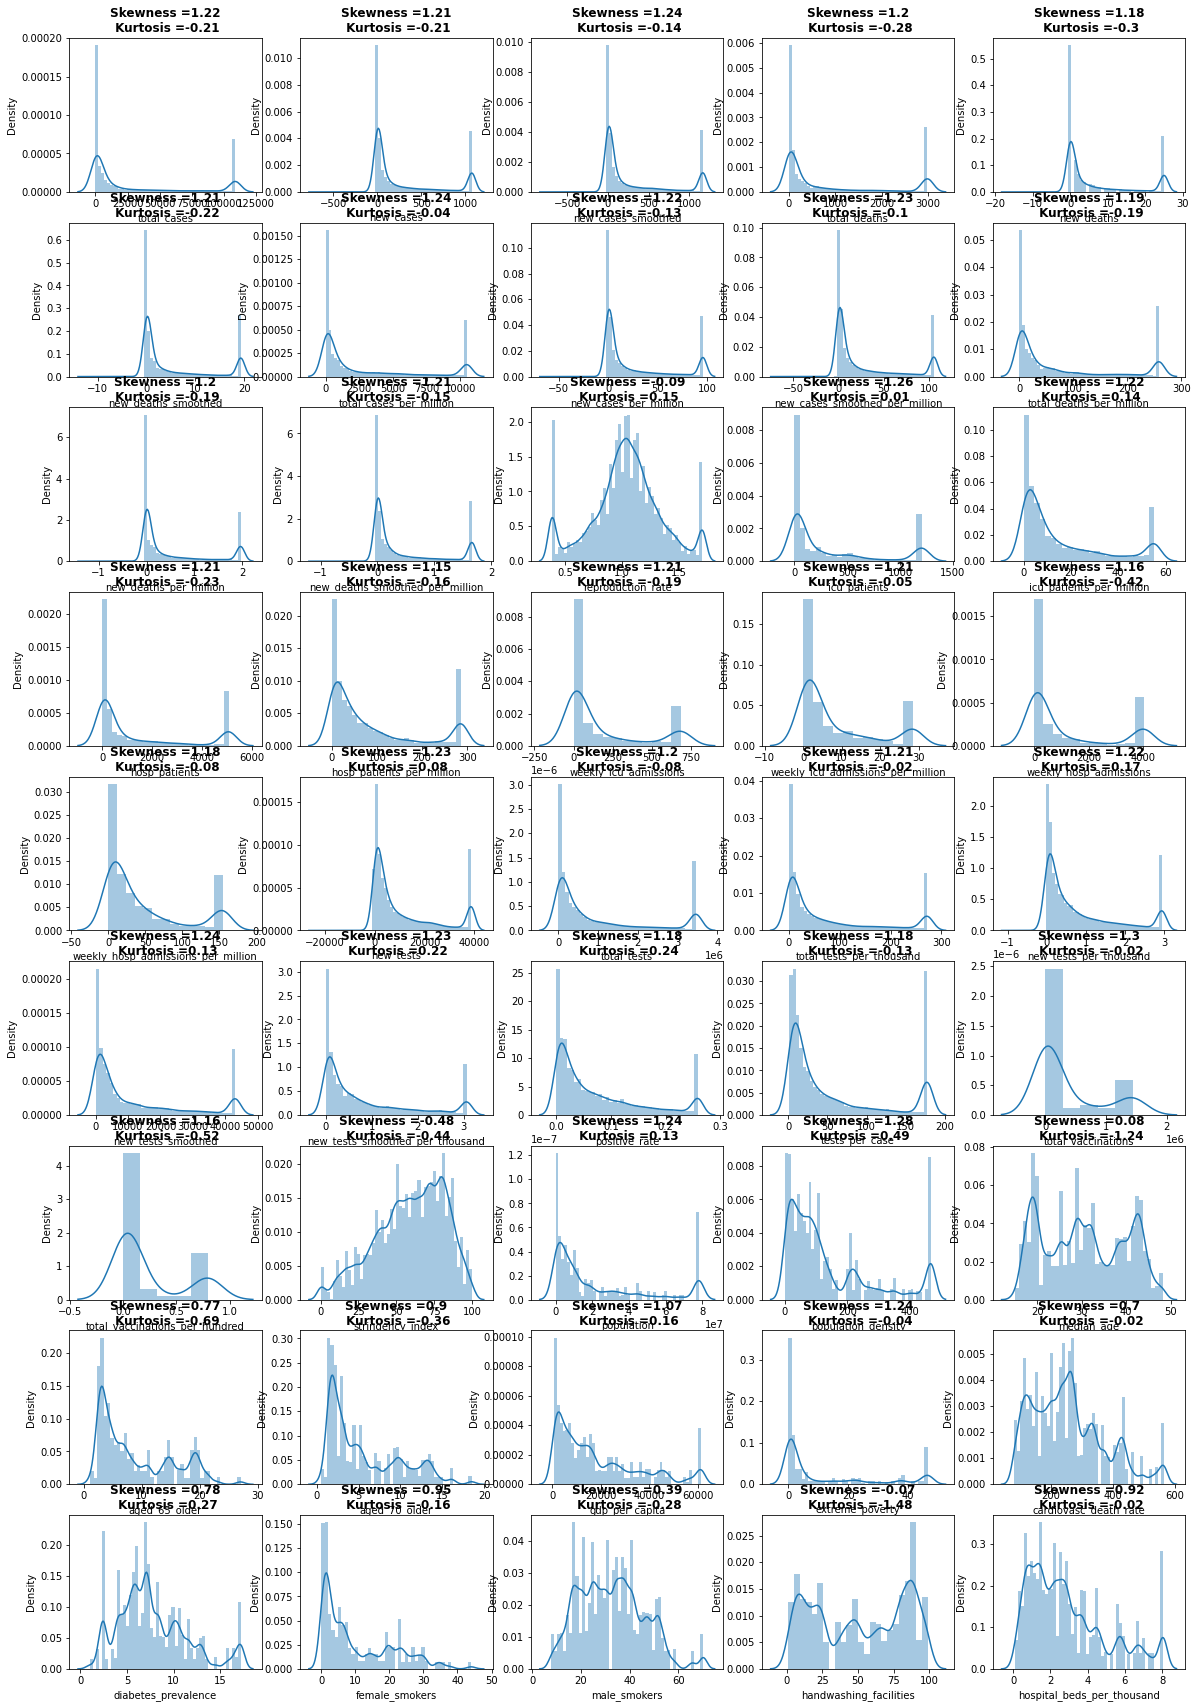

In [22]:
#Checking for Skewness and Kurtosis of every feature and Visualization
plt.figure(figsize=(20,30))
for i in range(len(numerical_feats)):
    plt.subplot(9, 5, i+1)
    sns.distplot(data[numerical_feats[i]])
    plt.title('Skewness ='+str(round(data[numerical_feats[i]].skew(), 2))+'\n Kurtosis ='+str(round(data[numerical_feats[i]].kurt(), 2)),
              fontweight="bold")
plt.tight_layout()

-  **YES A DRASTIC CHANGE BECAUSE OF  OUTLIER TREAMENT IN SKEWNESS AND KURTOSIS, LETS NOW COMBINED ALIKE FEATURES AND DECREASE DIMENSIONS TO REMOVE THE CURSE OF DIMENSIONALITY.**

In [24]:
(data.isnull().mean())*100

iso_code                               0.573648
continent                              1.175536
location                               0.000000
date                                   0.000000
total_cases                            0.983144
new_cases                              0.993734
new_cases_smoothed                     2.681140
total_deaths                          15.474362
new_deaths                            15.476127
new_deaths_smoothed                    2.681140
total_cases_per_million                1.556791
new_cases_per_million                  1.567382
new_cases_smoothed_per_million         3.245962
total_deaths_per_million              16.025064
new_deaths_per_million                16.026829
new_deaths_smoothed_per_million        3.245962
reproduction_rate                     24.979260
icu_patients                          89.065396
icu_patients_per_million              89.065396
hosp_patients                         87.773365
hosp_patients_per_million             87

In [25]:
#DROPPING ALL ROWS WHICH ALL FEATURES ARE MISSING.
data.dropna(how='all',inplace=True)

- **FILLING NULL VALUES WITH ZEROS AND THEN APPLYING STATS MODULE TO KNOW THE IMPORTANT FEATURES.THERE BY REDUCING THE CURSE OF DIMENSIONALITY.**

In [26]:
data.fillna(value=0,axis=0,inplace=True)

**HERE WE ARE FILLING NULL VALUES WITH ZERO SO MANY NULL VALUES AND THERE NO TELLING WHAT IS REALLY IMPORTANT SO BEST STRATERGY IS TO FILL WITH ZEROS.**

**NOW LETS CHECK IF NULL VALUES EXIST**

In [27]:
data.isnull().sum()

iso_code                              0
continent                             0
location                              0
date                                  0
total_cases                           0
new_cases                             0
new_cases_smoothed                    0
total_deaths                          0
new_deaths                            0
new_deaths_smoothed                   0
total_cases_per_million               0
new_cases_per_million                 0
new_cases_smoothed_per_million        0
total_deaths_per_million              0
new_deaths_per_million                0
new_deaths_smoothed_per_million       0
reproduction_rate                     0
icu_patients                          0
icu_patients_per_million              0
hosp_patients                         0
hosp_patients_per_million             0
weekly_icu_admissions                 0
weekly_icu_admissions_per_million     0
weekly_hosp_admissions                0
weekly_hosp_admissions_per_million    0


**NO NULL VALUES!**

**NOW LETS SPLIT THE DATA INTO X AND Y AND CHECKING FOR  MULTI COLLINEARITY**

**FOR NUMERICAL FEATURES :**

In [28]:
import statsmodels.api as sm
X=data.drop(['iso_code', 'continent', 'location', 'date', 'tests_units'],axis=1)
Y=data['life_expectancy']
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.198e+21
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:16:09   Log-Likelihood:             9.8724e+05
No. Observations:               56655   AIC:                        -1.974e+06
Df Residuals:                   56607   BIC:                        -1.974e+06
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                              -1.129e-12   2.43e-10     -0.005      0.996   -4.77e-10    4.74e-10
total_cases                        -1.342e-16   2.53e-15     -0.053      0.958    -5.1e-15    4.83e-15
new_cases                           1.933e-15   3.34e-13      0.006      0.995   -6.53e-13    6.57e-13
new_cases_smoothed                  1.682e-15   3.44e-13      0.005      0.996   -6.72e-13    6.76e-13
total_deaths                        2.787e-15   9.45e-14      0.030      0.976   -1.82e-13    1.88e-13
new_deaths                          1.428e-14   1.26e-11      0.001      0.999   -2.47e-11    2.47e-11
new_deaths_smoothed                 -3.43e-14    1.7e-11     -0.002      0.998   -3.33e-11    3.32e-11
total_cases_per_million             7.565e-16   2.24e-14      0.034      0.973   -4.31e-14    4.46e-14
new_cases_per_million              -2.086e-14    2.8e-12     -0.007      0.994   -5.52e-12    5.47e-12
new_cases_smoothed_per_million     -2.231e-14   2.84e-12     -0.008      0.994   -5.59e-12    5.54e-12
total_deaths_per_million           -3.806e-14   8.83e-13     -0.043      0.966   -1.77e-12    1.69e-12
new_deaths_per_million             -4.215e-14   1.13e-10     -0.000      1.000   -2.22e-10    2.22e-10
new_deaths_smoothed_per_million      6.03e-14   1.43e-10      0.000      1.000   -2.81e-10    2.81e-10
reproduction_rate                   1.292e-14   6.32e-11      0.000      1.000   -1.24e-10    1.24e-10
icu_patients                        1.941e-15    4.4e-13      0.004      0.996   -8.61e-13    8.65e-13
icu_patients_per_million           -1.512e-14   8.95e-12     -0.002      0.999   -1.76e-11    1.75e-11
hosp_patients                       2.187e-15   9.82e-14      0.022      0.982    -1.9e-13    1.95e-13
hosp_patients_per_million          -2.999e-14   1.65e-12     -0.018      0.985   -3.25e-12    3.19e-12
weekly_icu_admissions              -5.042e-15   2.02e-12     -0.002      0.998   -3.96e-12    3.95e-12
weekly_icu_admissions_per_million  -4.932e-15   4.66e-11     -0.000      1.000   -9.14e-11    9.14e-11
weekly_hosp_admissions               4.99e-16   3.05e-13      0.002      0.999   -5.98e-13    5.99e-13
weekly_hosp_admissions_per_million -3.044e-16   7.75e-12  -3.93e-05      1.000   -1.52e-11    1.52e-11
new_tests                           1.274e-17   9.25e-15      0.001      0.999   -1.81e-14    1.81e-14
total_tests                         1.378e-16   8.56e-17      1.610      0.107   -2.99e-17    3.06e-16
total_tests_per_thousand           -3.707e-16   1.12e-12     -0.000      1.000   -2.19e-12    2.19e-12
new_tests_per_thousand             -1.509e-14   1.31e-10     -0.000      1.000   -2.57e-10    2.57e-10
new_tests_smoothed                  2.126e-17   7.96e-15      0.003      0.998   -1.56e-14    1.

In [29]:
import statsmodels.formula.api as sm
X=data.drop(list(numerical_feats),axis=1)
Y=data['life_expectancy']
model=sm.ols(formula="life_expectancy ~ C(iso_code)+C(continent)+C(location)+C(date)+C(tests_units)",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.071e+06
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:16:35   Log-Likelihood:                 97245.
No. Observations:               56655   AIC:                        -1.934e+05
Df Residuals:                   56098   BIC:                        -1.884e+05
Df Model:                         556                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                          17.4795   2.28e+10   7.65e-10      1.000   -4.48e+10    4.48e+10
C(iso_code)[T.AFG]                                 -8.0986   6.77e+08   -1.2e-08      1.000   -1.33e+09    1.33e+09
C(iso_code)[T.AGO]                                 -1.5340   4.68e+09  -3.28e-10      1.000   -9.17e+09    9.17e+09
C(iso_code)[T.ALB]                                 -2.9505   8.97e+09  -3.29e-10      1.000   -1.76e+10    1.76e+10
C(iso_code)[T.AND]                                  2.7935   1.48e+09   1.89e-09      1.000   -2.89e+09    2.89e+09
C(iso_code)[T.ARE]                                  1.3099   3.35e+09   3.91e-10      1.000   -6.56e+09    6.56e+09
C(iso_code)[T.ARG]                                  3.2187   7.09e+09   4.54e-10      1.000   -1.39e+10    1.39e+10
C(iso_code)[T.ARM]                                 -0.8531   2.43e+09  -3.51e-10      1.000   -4.77e+09    4.77e+09
C(iso_code)[T.ATG]                                  1.6038   2.06e+09   7.79e-10      1.000   -4.03e+09    4.03e+09
C(iso_code)[T.AUS]                                  9.2864   3.72e+09    2.5e-09      1.000   -7.29e+09    7.29e+09
C(iso_code)[T.AUT]                                  1.7526   1.24e+09   1.41e-09      1.000   -2.43e+09    2.43e+09
C(iso_code)[T.AZE]                                 -0.8012   1.25e+09  -6.42e-10      1.000   -2.44e+09    2.44e+09
C(iso_code)[T.BDI]                                 -1.6096   5.86e+09  -2.75e-10      1.000   -1.15e+10    1.15e+10
C(iso_code)[T.BEL]                                  2.2449   5.76e+07    3.9e-08      1.000   -1.13e+08    1.13e+08
C(iso_code)[T.BEN]                                 -2.1463   5.23e+09   -4.1e-10      1.000   -1.03e+10    1.03e+10
C(iso_code)[T.BFA]                                 -1.4574   3.47e+09   -4.2e-10      1.000    -6.8e+09     6.8e+09
C(iso_code)[T.BGD]                                 -0.6820   3.85e+08  -1.77e-09      1.000   -7.55e+08    7.55e+08
C(iso_code)[T.BGR]                                 -1.3896   2.99e+09  -4.64e-10      1.000   -5.86e+09    5.86e+09
C(iso_code)[T.BHR]                                  0.6596   8.11e+08   8.14e-10      1.000   -1.59e+09    1.59e+09
C(iso_code)[T.BHS]                                 -0.2739   4.99e+08  -5.48e-10      1.000   -9.79e+08    9.79e+08
C(iso_code)[T.BIH]                                 -0.0160   2.29e+09  -6.98e-12      1.000   -4.48e+09    4.48e+09
C(iso_code)[T.BLR]                                 -1.4259    1.9e+09  -7.49e-10      1.000   -3.73e+09    3.73e+09
C(iso_code)[T.BLZ]                                  0.8756   2.56e+09   3.42e-10      1.000   -5.01e+09    5.01e+09
C(iso_code)[T.BOL]                                  0.9134   2.79e+

**|P|>0.05 THEY ARE :   
human_development_index, hospital_beds_per_thousand, handwashing_facilities, male_smokers, female_smokers, diabetes_prevalence, extreme_poverty, aged_70_older, aged_65_older, median_age, total_tests, weekly_hosp_admissions_per_million, weekly_hosp_admissons, icu_patients_per_million, icu_patients, new_deaths_smoothed_per_million, 'iso_code', 'continent', 'location', 'date', 'tests_units**

In [30]:
Drop_feats=['human_development_index','hospital_beds_per_thousand','handwashing_facilities','male_smokers','female_smokers','diabetes_prevalence','extreme_poverty','aged_70_older','aged_65_older','median_age','total_tests','weekly_hosp_admissions_per_million','weekly_hosp_admissions','icu_patients_per_million','icu_patients','new_deaths_smoothed_per_million','iso_code','continent','location','date','tests_units']

In [31]:
data.drop(Drop_feats,axis=1,inplace=True)

In [32]:
#Cleaned dataset

In [33]:
data.dtypes

total_cases                          float64
new_cases                            float64
new_cases_smoothed                   float64
total_deaths                         float64
new_deaths                           float64
new_deaths_smoothed                  float64
total_cases_per_million              float64
new_cases_per_million                float64
new_cases_smoothed_per_million       float64
total_deaths_per_million             float64
new_deaths_per_million               float64
reproduction_rate                    float64
hosp_patients                        float64
hosp_patients_per_million            float64
weekly_icu_admissions                float64
weekly_icu_admissions_per_million    float64
new_tests                            float64
total_tests_per_thousand             float64
new_tests_per_thousand               float64
new_tests_smoothed                   float64
new_tests_smoothed_per_thousand      float64
positive_rate                        float64
tests_per_

In [34]:
data.columns

Index(['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'reproduction_rate', 'hosp_patients', 'hosp_patients_per_million',
       'weekly_icu_admissions', 'weekly_icu_admissions_per_million',
       'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'total_vaccinations_per_hundred', 'stringency_index', 'population',
       'population_density', 'gdp_per_capita', 'cardiovasc_death_rate',
       'life_expectancy'],
      dtype='object')

In [35]:
#Checking for Correlation in between Features.

In [36]:
X=data.drop('life_expectancy',axis=1)
import matplotlib.pyplot as plt
X.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,gdp_per_capita,cardiovasc_death_rate
total_cases,1.000000,0.813195,0.849672,0.913187,0.762277,0.800292,0.632246,0.542258,0.553828,0.676152,0.562007,0.166738,0.334060,0.262263,0.090580,0.062607,0.615224,0.373122,0.343825,0.688020,0.398500,0.410156,-0.066316,0.035832,0.035704,0.151480,0.449218,0.016883,0.259803,-0.067221
new_cases,0.813195,1.000000,0.962614,0.754983,0.860220,0.854231,0.523889,0.681149,0.632432,0.550438,0.662731,0.279912,0.333031,0.298869,0.075802,0.062545,0.606297,0.325014,0.347865,0.634333,0.367889,0.514672,-0.146891,0.033652,0.025889,0.214003,0.432264,0.012884,0.217453,-0.049913
new_cases_smoothed,0.849672,0.962614,1.000000,0.790464,0.861222,0.887126,0.552637,0.645792,0.656689,0.583148,0.658495,0.257028,0.346697,0.311711,0.096042,0.079339,0.613095,0.328361,0.348310,0.655791,0.381329,0.521105,-0.151202,0.034385,0.026048,0.212860,0.437684,0.008632,0.222180,-0.060154
total_deaths,0.913187,0.754983,0.790464,1.000000,0.793444,0.826394,0.508576,0.435799,0.442436,0.700155,0.554663,0.171023,0.368358,0.271980,0.104214,0.074382,0.592905,0.282119,0.271405,0.663947,0.308046,0.360050,-0.065371,0.038408,0.027117,0.153241,0.505420,-0.012053,0.216515,-0.090895
new_deaths,0.762277,0.860220,0.861222,0.793444,1.000000,0.948499,0.440592,0.534665,0.512773,0.556056,0.742301,0.220503,0.373368,0.325481,0.079681,0.062022,0.547992,0.229260,0.244959,0.571095,0.254444,0.481262,-0.144816,0.035093,0.020207,0.222205,0.472932,-0.030507,0.145821,-0.038211
new_deaths_smoothed,0.800292,0.854231,0.887126,0.826394,0.948499,1.000000,0.468754,0.525650,0.533453,0.589321,0.697534,0.229517,0.366306,0.317357,0.094711,0.076326,0.551404,0.229568,0.243448,0.583191,0.260810,0.486049,-0.144864,0.033351,0.021426,0.241076,0.478487,-0.035208,0.149933,-0.034167
total_cases_per_million,0.632246,0.523889,0.552637,0.508576,0.440592,0.468754,1.000000,0.744747,0.806074,0.829945,0.607462,0.091363,0.233126,0.286232,0.076272,0.074670,0.347494,0.512272,0.470526,0.396983,0.531217,0.320624,-0.077184,0.034455,0.039814,-0.004281,-0.078513,0.047606,0.326003,-0.214784
new_cases_per_million,0.542258,0.681149,0.645792,0.435799,0.534665,0.525650,0.744747,1.000000,0.928405,0.639999,0.746148,0.247661,0.270425,0.323998,0.069705,0.071999,0.358489,0.452132,0.483794,0.369602,0.499896,0.433354,-0.164356,0.027567,0.038231,0.117539,-0.042770,0.037571,0.293683,-0.136185
new_cases_smoothed_per_million,0.553828,0.632432,0.656689,0.442436,0.512773,0.533453,0.806074,0.928405,1.000000,0.687308,0.730698,0.221249,0.271674,0.338590,0.087410,0.087686,0.342639,0.451257,0.480142,0.366423,0.509925,0.429682,-0.177103,0.028031,0.039192,0.105550,-0.060302,0.041239,0.301894,-0.164331
total_deaths_per_million,0.676152,0.550438,0.583148,0.700155,0.556056,0.589321,0.829945,0.639999,0.687308,1.000000,0.666585,0.127951,0.362584,0.342751,0.104703,0.091047,0.397096,0.394354,0.382829,0.450302,0.411358,0.296273,-0.059211,0.033207,0.038675,0.051687,0.054239,0.006107,0.322752,-0.234194


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(data.drop('life_expectancy',axis=1))
Y=scaler.fit_transform(data['life_expectancy'].values.reshape(-1,1))

In [38]:
X

array([[9.18115568e-06, 3.75000000e-01, 3.72850784e-01, ...,
        1.16658860e-01, 2.94632297e-02, 1.00000000e+00],
       [9.18115568e-06, 3.74419954e-01, 3.72850784e-01, ...,
        1.16658860e-01, 2.94632297e-02, 1.00000000e+00],
       [9.18115568e-06, 3.74419954e-01, 3.72850784e-01, ...,
        1.16658860e-01, 2.94632297e-02, 1.00000000e+00],
       ...,
       [1.18253285e-01, 4.28944316e-01, 4.36789953e-01, ...,
        9.15937754e-02, 3.10276666e-02, 5.42990943e-01],
       [1.19015321e-01, 4.22563805e-01, 4.35178041e-01, ...,
        9.15937754e-02, 3.10276666e-02, 5.42990943e-01],
       [1.20061973e-01, 4.40545244e-01, 4.30572809e-01, ...,
        9.15937754e-02, 3.10276666e-02, 5.42990943e-01]])

In [39]:
Y

array([[0.74731988],
       [0.74731988],
       [0.74731988],
       ...,
       [0.70881844],
       [0.70881844],
       [0.70881844]])

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
bestfeatures=SelectKBest(score_func=f_regression,k=10)
fit=bestfeatures.fit(X,Y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(data.drop('life_expectancy',axis=1).columns)
#Concat two Data Frames for Better Visulaization
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']
print(featureScores)

                                Specs         Score
0                         total_cases   2869.427430
1                           new_cases   2620.583445
2                  new_cases_smoothed   2778.111402
3                        total_deaths   2724.142684
4                          new_deaths   1915.715700
5                 new_deaths_smoothed   2112.947634
6             total_cases_per_million   4135.018526
7               new_cases_per_million   3616.390461
8      new_cases_smoothed_per_million   3941.356384
9            total_deaths_per_million   4210.087211
10             new_deaths_per_million   2060.351286
11                  reproduction_rate    927.178709
12                      hosp_patients   1560.694961
13          hosp_patients_per_million   1882.142682
14              weekly_icu_admissions    121.984575
15  weekly_icu_admissions_per_million    144.717712
16                          new_tests   2999.114230
17           total_tests_per_thousand   5121.027376
18          

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
#Printing top 10 features
important_feats=featureScores.nlargest(10,'Score')['Specs']

In [42]:
important_feats=['gdp_per_capita',
 'new_tests_smoothed_per_thousand',
 'population_density',
 'new_tests_per_thousand',
 'total_tests_per_thousand',
 'new_tests_smoothed',
 'tests_per_case',
 'new_cases_smoothed_per_million',
 'new_cases_per_million',
 'total_cases_per_million']

In [43]:
X=data[important_feats]
y=data['life_expectancy']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
Y=scaler.fit_transform(data['life_expectancy'].values.reshape(-1,1))

In [44]:
X

array([[2.94632297e-02, 0.00000000e+00, 1.16658860e-01, ...,
        3.70605764e-01, 3.74777280e-01, 2.47567542e-06],
       [2.94632297e-02, 0.00000000e+00, 1.16658860e-01, ...,
        3.70605764e-01, 3.74606965e-01, 2.47567542e-06],
       [2.94632297e-02, 0.00000000e+00, 1.16658860e-01, ...,
        3.70605764e-01, 3.74606965e-01, 2.47567542e-06],
       ...,
       [3.10276666e-02, 3.59007833e-02, 9.15937754e-02, ...,
        4.18535265e-01, 4.16032897e-01, 8.25148330e-02],
       [3.10276666e-02, 3.45953003e-02, 9.15937754e-02, ...,
        4.17331938e-01, 4.11185460e-01, 8.30465319e-02],
       [3.10276666e-02, 3.10052219e-02, 9.15937754e-02, ...,
        4.13877614e-01, 4.24849991e-01, 8.37768561e-02]])

In [45]:
Y

array([[0.74731988],
       [0.74731988],
       [0.74731988],
       ...,
       [0.70881844],
       [0.70881844],
       [0.70881844]])

In [46]:
#### Splitting train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

**APPLYING SOME OF THE MOST POWERFUL MACHINE LEARNING ALGORITHUMNS**

**Linear Regression:**

In [48]:
from sklearn.linear_model import LinearRegression
#### instantiate and fit
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
LR_score_train = model_LR.score(X_train, Y_train)
print("Train Accuracy :",LR_score_train)

LR_score_test = model_LR.score(X_test, Y_test)
print("Test Accuracy  :",LR_score_test)

#### predicting 'price' using lin_reg
predictions_LR = model_LR.predict(X_test)

#### calculating RMSE, MSE, and MAE
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, predictions_LR))
print('MSE:', metrics.mean_squared_error(Y_test, predictions_LR))
LR_RMSE=np.sqrt(metrics.mean_squared_error(Y_test, predictions_LR))
print('RMSE:', LR_RMSE)
final_results = []
dict_LR = {'MODEL':'Linear Regression',
           'Train_ACCURACY':LR_score_train,
           'Test_ACCURACY':LR_score_test,
           'RMSE':LR_RMSE
          }
final_results.append(dict_LR)

Train Accuracy : 0.31875124941836197
Test Accuracy  : 0.3183158966985431
MAE: 0.05583308853293601
MSE: 0.010116924744377897
RMSE: 0.10058292471576821


**Ridge Regression :**

In [ ]:
from sklearn import linear_model
model_LR_Ridge = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
model_LR_Ridge.fit(X_train,Y_train)
LR_Ridge_score_train = model_LR_Ridge.score(X_train,Y_train)
print("Train Accuracy :",LR_Ridge_score_train)

LR_Ridge_score_test = model_LR_Ridge.score(X_test,Y_test)
print("Test Accuracy  :",LR_Ridge_score_test)

predictions_LR_Ridge = model_LR_Ridge.predict(X_test)

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, predictions_LR_Ridge))
print('MSE:', metrics.mean_squared_error(Y_test, predictions_LR_Ridge))
LR_Ridge_RMSE=np.sqrt(metrics.mean_squared_error(Y_test, predictions_LR_Ridge))
print('RMSE:', LR_Ridge_RMSE)

dict_LR_Ridge = {'MODEL':'Ridge Regression',
                 'Train_ACCURACY':LR_Ridge_score_train,
                 'Test_ACCURACY':LR_Ridge_score_test,
                 'RMSE':LR_Ridge_RMSE
                }
final_results.append(dict_LR_Ridge)

Train Accuracy : 0.3186230490577926
Test Accuracy  : 0.31829525888671106
MAE: 0.05583353255149834
MSE: 0.010117231031686318
RMSE: 0.10058444726540142


**Lasso Regressor:**

In [ ]:
from sklearn import linear_model
model_LR_Lasso = linear_model.LassoCV(alphas=np.logspace(-6, 6, 13))
model_LR_Lasso.fit(X_train,Y_train)


LR_Lasso_score_train = model_LR_Lasso.score(X_train,Y_train)
print("Train Accuracy :",LR_Lasso_score_train)

LR_Lasso_score_test = model_LR_Lasso.score(X_test,Y_test)
print("Test Accuracy  :",LR_Lasso_score_test)

predictions_LR_Lasso = model_LR_Lasso.predict(X_test)

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, predictions_LR_Lasso))
print('MSE:', metrics.mean_squared_error(Y_test, predictions_LR_Lasso))
LR_Lasso_RMSE=np.sqrt(metrics.mean_squared_error(Y_test, predictions_LR_Lasso))
print('RMSE:', LR_Lasso_RMSE)

dict_LR_Lasso = {'MODEL':'Lasso Regression',
                 'Train_ACCURACY':LR_Lasso_score_train,
                 'Test_ACCURACY':LR_Lasso_score_test,
                 'RMSE':LR_Lasso_RMSE
                }
final_results.append(dict_LR_Lasso)

Train Accuracy : 0.3186230951104524
Test Accuracy  : 0.3182967392574241
MAE: 0.05583383978030941
MSE: 0.010117209061393883
RMSE: 0.10058433805217333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**KNN Regressor**

In [52]:
from sklearn import neighbors as nb
model_KNN=nb.KNeighborsRegressor(n_neighbors=4,n_jobs=-1)
model_KNN.fit(X_train,Y_train)

KNN_score_train = model_KNN.score(X_train,Y_train)
print("Train Accuracy :",KNN_score_train)

KNN_score_test = model_KNN.score(X_test,Y_test)
print("Test Accuracy  :",KNN_score_test)


Train Accuracy : 0.9841637207321022
Test Accuracy  : 0.9749177016873857


In [53]:
import sklearn.model_selection as model_selection
model_KNN=model_selection.GridSearchCV(model_KNN,param_grid={'n_neighbors':[i for i in range(1,13)],'weights':['uniform','distance']})
model_KNN.fit(X_train,Y_train)
print(model_KNN.best_params_)
KNN_score_train = model_KNN.score(X_train,Y_train)
print("Train Accuracy :",KNN_score_train)

KNN_score_test = model_KNN.score(X_test,Y_test)
print("Test Accuracy  :",KNN_score_test)

predictions_KNN = model_KNN.predict(X_test)

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, predictions_KNN))
print('MSE:', metrics.mean_squared_error(Y_test, predictions_KNN))
KNN_RMSE=np.sqrt(metrics.mean_squared_error(Y_test, predictions_KNN))
print('RMSE:', KNN_RMSE)


dict_KNN = {'MODEL':'KNN Regressor',
            'Train_ACCURACY':KNN_score_train,
            'Test_ACCURACY':KNN_score_test,
            'RMSE':KNN_RMSE}
final_results.append(dict_KNN)

{'n_neighbors': 1, 'weights': 'uniform'}
Train Accuracy : 0.9928812460892742
Test Accuracy  : 0.9770953897367467
MAE: 0.0011581023198024942
MSE: 0.00033992903341940677
RMSE: 0.01843716446255787


**DT_Regression_Tree:**

Train Accuracy : 0.6713260539585664
Test Accuracy  : 0.6936020931678945


[Text(383.625, 380.52, 'gdp_per_capita <= 0.166\nmse = 0.015\nsamples = 39658\nvalue = 0.834'),
 Text(209.25, 271.8, 'gdp_per_capita <= 0.16\nmse = 0.021\nsamples = 18122\nvalue = 0.763'),
 Text(139.5, 163.07999999999998, 'total_cases_per_million <= 0.0\nmse = 0.014\nsamples = 17921\nvalue = 0.771'),
 Text(69.75, 54.360000000000014, 'mse = 0.153\nsamples = 355\nvalue = 0.282'),
 Text(209.25, 54.360000000000014, 'mse = 0.007\nsamples = 17566\nvalue = 0.781'),
 Text(279.0, 163.07999999999998, 'mse = -0.0\nsamples = 201\nvalue = 0.0'),
 Text(558.0, 271.8, 'gdp_per_capita <= 0.503\nmse = 0.003\nsamples = 21536\nvalue = 0.894'),
 Text(418.5, 163.07999999999998, 'population_density <= 0.027\nmse = 0.002\nsamples = 13355\nvalue = 0.867'),
 Text(348.75, 54.360000000000014, 'mse = 0.001\nsamples = 1441\nvalue = 0.818'),
 Text(488.25, 54.360000000000014, 'mse = 0.002\nsamples = 11914\nvalue = 0.873'),
 Text(697.5, 163.07999999999998, 'population_density <= 0.665\nmse = 0.001\nsamples = 8181\nval

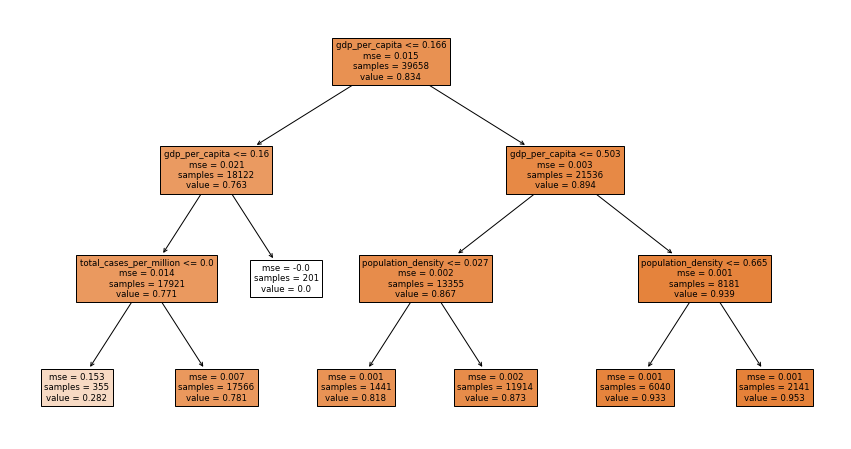

In [ ]:
import sklearn.tree as tree
model_DT=tree.DecisionTreeRegressor(max_depth=3)
model_DT.fit(X_train,Y_train)
DT_score_train = model_DT.score(X_train,Y_train)
print("Train Accuracy :",DT_score_train)

DT_score_test = model_DT.score(X_test,Y_test)
print("Test Accuracy  :",DT_score_test)
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text

features  = important_feats
plt.figure(figsize=(15,8))
plot_tree(model_DT, feature_names=features, filled = True)

In [ ]:
predictions_DT = model_DT.predict(X_test)

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, predictions_DT))
print('MSE:', metrics.mean_squared_error(Y_test, predictions_DT))
DT_RMSE=np.sqrt(metrics.mean_squared_error(Y_test, predictions_DT))
print('RMSE:', DT_RMSE)


dict_DT = {'MODEL':'DT Regressor',
           'Train_ACCURACY':DT_score_train,
           'Test_ACCURACY':DT_score_test,
           'RMSE':DT_RMSE}
final_results.append(dict_DT)

MAE: 0.04554336346747402
MSE: 0.004547274243660212
RMSE: 0.0674334801390245


**Random Forest Regressor:**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
list_RFR=[]
#Tune number of trees
for i in range(10,200,10):
    model_RFR=RandomForestRegressor(n_estimators=i,random_state=10)
    model_RFR.fit(X_train,Y_train)
    dict_RFR={}
    dict_RFR["Number of trees"] = str(i)
    dict_RFR["ACCURACY"]=model_RFR.score(X_test,Y_test)
    list_RFR.append(dict_RFR)    
(pd.DataFrame(list_RFR)
     .sort_values(by=['ACCURACY'],ascending=False)
     .reset_index(drop=True)
     .style.background_gradient(cmap='Blues'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was pas

,Number of trees,ACCURACY
0,160,0.995578
1,190,0.995576
2,30,0.995575
3,180,0.995549
4,170,0.995548
5,150,0.995542
6,10,0.995504
7,130,0.995494
8,140,0.995467
9,120,0.995446


In [ ]:
model_RFR = RandomForestRegressor(n_estimators=30,random_state=10)
model_RFR.fit(X_train, Y_train)

RFR_score_train = model_RFR.score(X_train, Y_train)
print("Train Accuracy :",RFR_score_train)

RFR_score_test = model_RFR.score(X_test,Y_test)
print("Test Accuracy  :",RFR_score_test)

predictions_RFR = model_RFR.predict(X_test)

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, predictions_RFR))
print('MSE:', metrics.mean_squared_error(Y_test, predictions_RFR))
RFR_RMSE=np.sqrt(metrics.mean_squared_error(Y_test, predictions_RFR))
print('RMSE:', RFR_RMSE)

dict_RFR = {'MODEL':'Random Forest Regressor',
            'Train_ACCURACY':RFR_score_train,
            'Test_ACCURACY':RFR_score_test,
            'RMSE':RFR_RMSE
           }
final_results.append(dict_RFR)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train Accuracy : 0.9928867529894392
Test Accuracy  : 0.995574532985601
MAE: 0.000264536123201957
MSE: 6.567868683832684e-05
RMSE: 0.008104238819181406


In [ ]:
from sklearn.ensemble import BaggingRegressor
list_BR=[]
#Tune number of trees
for i in range(10,200,10):
    model_BR=BaggingRegressor(n_estimators=i,oob_score=True,random_state=200)
    model_BR.fit(X_train,Y_train)
    dict_BR={}
    dict_BR["Number of trees"] = str(i)
    dict_BR["ACCURACY"]=model_BR.score(X_test,Y_test)
    list_BR.append(dict_BR)
(pd.DataFrame(list_BR)
     .sort_values(by=['ACCURACY'],ascending=False)
     .reset_index(drop=True)
     .style.background_gradient(cmap='Blues'))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  

,Number of trees,ACCURACY
0,60,0.995872
1,30,0.995857
2,50,0.995755
3,140,0.995745
4,70,0.995708
5,120,0.995691
6,130,0.995688
7,40,0.995688
8,180,0.995685
9,190,0.995681


In [ ]:
model_BR=BaggingRegressor(n_estimators=30,oob_score=True,random_state=200)
model_BR.fit(X_train,Y_train)

BR_score_train = model_BR.score(X_train,Y_train)
print("Train Accuracy :",BR_score_train)

BR_score_test = model_BR.score(X_test,Y_test)
print("Test Accuracy :",BR_score_test)

predictions_BR = model_BR.predict(X_test)

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, predictions_BR))
print('MSE:', metrics.mean_squared_error(Y_test, predictions_BR))
BR_RMSE=np.sqrt(metrics.mean_squared_error(Y_test, predictions_BR))
print('RMSE:', BR_RMSE)

dict_BR = {'MODEL':'Bagging Regressor',
           'Train_ACCURACY':BR_score_train,
           'Test_ACCURACY':BR_score_test,
           'RMSE':BR_RMSE
          }
final_results.append(dict_BR)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Train Accuracy : 0.9929300199874281
Test Accuracy : 0.9958572714558209
MAE: 0.0002403861588862321
MSE: 6.14825440623657e-05
RMSE: 0.007841080541759898



**ElasticNet Regressor**

In [ ]:
from sklearn.linear_model import ElasticNet
model_ENR = ElasticNet(random_state=0)
model_ENR.fit(X_train,Y_train)

ENR_score_train = model_ENR.score(X_train,Y_train)
print("Train Accuracy :",ENR_score_train)

ENR_score_test = model_ENR.score(X_test,Y_test)
print("Test Accuracy  :",ENR_score_test)
predictions_ENR = model_ENR.predict(X_test)

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, predictions_ENR))
print('MSE:', metrics.mean_squared_error(Y_test, predictions_ENR))
ENR_RMSE=np.sqrt(metrics.mean_squared_error(Y_test, predictions_ENR))
print('RMSE:', ENR_RMSE)

dict_ENR = {'MODEL':'ElasticNet Regressor',
            'Train_ACCURACY':ENR_score_train,
            'Test_ACCURACY':ENR_score_test,
            'RMSE':ENR_RMSE
           }
final_results.append(dict_ENR)

Train Accuracy : 0.0
Test Accuracy  : -1.6120769653182876e-05
MAE: 0.0797699251427073
MSE: 0.014841314016262578
RMSE: 0.1218249318336053


**Gradient Boosting Regressor:**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_GBR = GradientBoostingRegressor()
model_GBR.fit(X_train,Y_train)
GBR_score_train = model_GBR.score(X_train,Y_train)
print("Train Accuracy :",GBR_score_train)
GBR_score_test = model_GBR.score(X_test,Y_test)
print("Test Accuracy  :",GBR_score_test)
predictions_GBR = model_GBR.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions_GBR))
print('MSE:', metrics.mean_squared_error(Y_test, predictions_GBR))
GBR_RMSE=np.sqrt(metrics.mean_squared_error(Y_test, predictions_GBR))
print('RMSE:', GBR_RMSE)
dict_GBR = {'MODEL':'Gradient Boosting Regressor',
            'Train_ACCURACY':GBR_score_train,
            'Test_ACCURACY':GBR_score_test,
            'RMSE':GBR_RMSE
           }
final_results.append(dict_GBR)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy : 0.9430465364592079
Test Accuracy  : 0.9456604518023911
MAE: 0.020391641134826183
MSE: 0.0008064572975902193
RMSE: 0.02839819180141967


**Histogram-Based Gradient Boosting Regressor:**

In [49]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
model_HGBR = HistGradientBoostingRegressor()
model_HGBR.fit(X_train,Y_train)
HGBR_score_train = model_HGBR.score(X_train,Y_train)
print("Train Accuracy :",HGBR_score_train)
HGBR_score_test = model_HGBR.score(X_test,Y_test)
print("Test Accuracy  :",HGBR_score_test)
predictions_HGBR = model_HGBR.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions_HGBR))
print('MSE:', metrics.mean_squared_error(Y_test, predictions_HGBR))
HGBR_RMSE=np.sqrt(metrics.mean_squared_error(Y_test, predictions_HGBR))
print('RMSE:', HGBR_RMSE)
dict_HGBR = {'MODEL':'Histogram Based GBR',
             'Train_ACCURACY':HGBR_score_train,
             'Test_ACCURACY':HGBR_score_test,
             'RMSE':HGBR_RMSE
            }
final_results.append(dict_HGBR)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy : 0.9921359057975482
Test Accuracy  : 0.9955634523334084
MAE: 0.002899502370608531
MSE: 6.584313562598021e-05
RMSE: 0.008114378326525095


**Gradient Boosting With XGBoost Regressor:**

In [50]:
from xgboost import XGBRegressor
model_XGBR = XGBRegressor()
model_XGBR.fit(X_train,Y_train)
XGBR_score_train = model_XGBR.score(X_train,Y_train)
print("Train Accuracy :",XGBR_score_train)
XGBR_score_test = model_XGBR.score(X_test,Y_test)
print("Train Accuracy :",XGBR_score_test)
predictions_XGBR = model_XGBR.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions_XGBR))
print('MSE:', metrics.mean_squared_error(Y_test, predictions_XGBR))
XGBR_RMSE=np.sqrt(metrics.mean_squared_error(Y_test, predictions_XGBR))
print('RMSE:', XGBR_RMSE)
dict_XGBR = {'MODEL':'XGBoost Regressor',
             'Train_ACCURACY':XGBR_score_train,
             'Test_ACCURACY':XGBR_score_test,
             'RMSE':XGBR_RMSE
            }
final_results.append(dict_XGBR)

[17:19:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train Accuracy : 0.9455019489415242
Train Accuracy : 0.9477969875195715
MAE: 0.02011777815046501
MSE: 0.0007747488112697876
RMSE: 0.027834309965756067


**Gradient Boosting With LightGBM Regressor:**

In [51]:
from lightgbm import LGBMRegressor
model_LGBR = LGBMRegressor()
model_LGBR.fit(X_train,Y_train)
LGBR_score_train = model_LGBR.score(X_train,Y_train)
print("Train Accuracy :",LGBR_score_train)
LGBR_score_test = model_LGBR.score(X_test,Y_test)
print("Test Accuracy  :",LGBR_score_test)
predictions_LGBR = model_LGBR.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions_LGBR))
print('MSE:', metrics.mean_squared_error(Y_test, predictions_LGBR))
LGBR_RMSE=np.sqrt(metrics.mean_squared_error(Y_test, predictions_LGBR))
print('RMSE:', LGBR_RMSE)
dict_LGBR = {'MODEL':'LightGBM Regressor',
             'Train_ACCURACY':LGBR_score_train,
             'Test_ACCURACY':LGBR_score_test,
             'RMSE':LGBR_RMSE
            }
final_results.append(dict_LGBR)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy : 0.9921735218974965
Test Accuracy  : 0.9956429856185234
MAE: 0.0028468280148465394
MSE: 6.466277619514563e-05
RMSE: 0.008041316819722106


In [54]:
import pickle
pickle.dump(model_KNN, open('model.pkl','wb'))